In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from statistics import mean 

In [2]:
#data preprocessing (randomisation+normalisation)
f = open('Dataset_q1.data', 'r')
f1 = f.readlines()
random.shuffle(f1)
n = len(f1)
x = []
y = []
p = 0
# infant =0 male = 2 female =1
for i in f1:
    p = i.split()
    if (p[0] == 'M'):
        p[0] = 2
    elif (p[0] == 'F'):
        p[0] = 1
    elif (p[0] == 'I'):
        p[0] = 0
    y.append([float(p[-1])])
    p = p[:-1]
    x.append([1] + list(map(float, p)))  # this to for x0 to be 1
max_val = [0]*len(x[0])
for i in range(len(x)):
        for j in range(len(x[i])):
            max_val[j] = max(max_val[j],x[i][j])
for i in range(len(x)):
    for j in range(len(x[i])):
        x[i][j] = x[i][j]/max_val[j]
# x = np.asmatrix(x)
# y = np.asmatrix(y)

In [3]:
def regression(x, y, alpha,x_val,y_val):
    epoch = 100000
    rms_arr = [0] * epoch
    rms_validation = [0]*epoch
    theta = np.zeros((1, 9))
    for i in range(9):
        theta[0, i] = 2
    y = np.reshape(y, (-1, 1))
    for k in range(epoch):
        b = x @ theta.T
        c = b - y
        ss = np.sum(x * c, axis=0)
        theta -= (alpha * ss / x.shape[0])
        rms_arr[k] = cost(x, y, theta)
        rms_validation[k] = cost(x_val,y_val,theta)
#     plt.plot(rms_arr)
#     plt.title('RMSE vs epoch for Training set')
#     plt.ylabel('RMSE')
#     plt.xlabel('epoch')
#     plt.show()
#     plt.plot(rms_validation)
#     plt.title('RMSE vs epoch for Validation set')
#     plt.ylabel('RMSE')
#     plt.xlabel('epoch')
#     plt.show()
    return theta,rms_arr[-1],rms_arr,rms_validation

In [4]:
def cost(x, y, theta):
    y = np.reshape(y, (-1, 1))
    arr = np.power(((x @ theta.T) - y), 2)
    return math.sqrt( np.sum(arr) / float(len(x)))

In [5]:
def cost_validation(x, y, theta):
    y = np.reshape(y, (-1, 1))
    arr1 = (x@ theta.T)-y
    plt.plot(abs(arr1))
    plt.show()
    arr = np.power((arr1), 2)
    return math.sqrt( np.sum(arr) / float(len(x)))

In [6]:
#implementing 5-fold
testing_x = []
training_x = []
testing_y = []
training_y = []
k = 5  # folds
fold_size = int(len(x) / k)
for i in range(k):
    test_x = []
    test_y = []
    train_x = []
    train_y = []
    for j in range(len(x)):
        if (j >= (i * fold_size) and j < ((i + 1) * fold_size)):
            test_x.append(x[j])
            test_y.append(y[j])
        else:
            train_x.append(x[j])
            train_y.append(y[j])
    testing_x.append(test_x)
    testing_y.append(test_y)
    training_x.append(train_x)
    training_y.append(train_y)

In [7]:
alpha = 0.1  # learning rate

In [8]:
min_cost = 1000000
v = -1
rms_arr_arr = [0]*5
rms_validation_arr = [0]*5
for i in range(5):  # change to 5
    train_x = np.asarray(training_x[i])
    test_x = np.asarray(testing_x[i])
    train_y = np.asarray(training_y[i])
    test_y = np.asarray(testing_y[i])
    theta,rms_err,rms_arr_arr[i],rms_validation_arr[i] = regression(train_x, train_y, alpha,test_x,test_y)
    print('Parameter vector Regression =>')
    print(theta.T)
    print(rms_err, 'RMSE Training set Regression')
    print(cost(test_x, test_y, theta), 'RMSE Testing set Regression')
    #normal equation
    theta1 = ((np.linalg.inv(train_x.T @ train_x))@(train_x.T @ train_y)).T
    print('Parameter vector Normal eqn =>')
    print(theta1.T)
    print(cost(train_x,train_y,theta1),'RMSE Training set Normal Eqn')
    cost_train = cost(test_x,test_y,theta1)
    if (cost_train<min_cost):
        min_cost = cost_train
        v = i
    print((cost_train),'RMSE Testing set Normal Eqn')
    print('-------------------------------------------')


Parameter vector Regression =>
[[  2.91261101]
 [  0.81241535]
 [ -0.70570969]
 [  8.23544662]
 [ 10.99178655]
 [ 20.64939516]
 [-27.44762807]
 [ -6.29818376]
 [ 10.83096766]]
2.185206442759107 RMSE Training set Regression
2.255816018015619 RMSE Testing set Regression
Parameter vector Normal eqn =>
[[  2.90714015]
 [  0.80715386]
 [ -0.77497363]
 [  8.35643849]
 [ 11.05718966]
 [ 24.78900341]
 [-29.54299167]
 [ -7.46384106]
 [  8.88677681]]
2.1841175356685447 RMSE Training set Normal Eqn
2.252786266319094 RMSE Testing set Normal Eqn
-------------------------------------------
Parameter vector Regression =>
[[  2.98405554]
 [  0.75627049]
 [ -1.30306672]
 [  8.39856305]
 [ 12.76978789]
 [ 21.31834645]
 [-27.90705655]
 [ -6.69442306]
 [ 11.06164433]]
2.1889009425263373 RMSE Training set Regression
2.2384257589703487 RMSE Testing set Regression
Parameter vector Normal eqn =>
[[  2.96561087]
 [  0.75125101]
 [ -1.35831427]
 [  8.54003686]
 [ 12.82804847]
 [ 25.59033985]
 [-30.14879757]
 [ 

2.1965838442362444


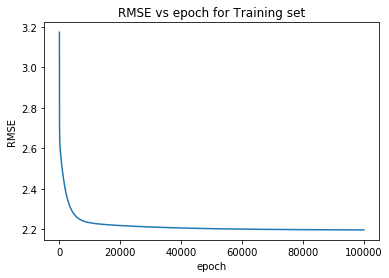

2.2142659183490236


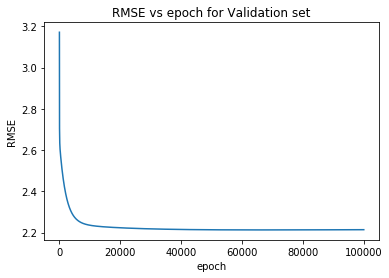

In [9]:
np_rms_arr = np.array([rms_arr_arr[0],rms_arr_arr[1],rms_arr_arr[2],rms_arr_arr[3],rms_arr_arr[4]])
np_rms_val = np.array([rms_validation_arr[0],rms_validation_arr[1],rms_validation_arr[2],rms_validation_arr[3],rms_validation_arr[4]])
arr_mean = np.mean(np_rms_arr,axis=0)
val_mean = np.mean(np_rms_val,axis=0)
plt.plot(arr_mean)
plt.title('RMSE vs epoch for Training set')
plt.ylabel('RMSE')
print(arr_mean[-1])
plt.xlabel('epoch')
plt.show()
plt.plot(val_mean)
plt.title('RMSE vs epoch for Validation set')
plt.ylabel('RMSE')
print(val_mean[-1])
plt.xlabel('epoch')
plt.show()

In [10]:
min_RMSE_test_x = np.asarray(testing_x[v])
min_RMSE_train_x = np.asarray(training_x[v])
min_RMSE_test_y = np.asarray(testing_y[v])
min_RMSE_train_y = np.asarray(training_y[v])

In [11]:
def regression_ridge_l2(x, y, alpha,x_val,y_val,L=0.1,epoch = 100000):
    print(L,'L')
    rms_arr = [0] * epoch
    rms_validation = [0]*epoch
    theta = np.zeros((1, 9))
    for i in range(9):
        theta[0, i] = 2
    y = np.reshape(y, (-1, 1))
    for k in range(epoch):
        b = x @ theta.T
        c = b - y
        ss = np.sum(x * c, axis=0) / x.shape[0]
        ss+= L*np.sum(theta)
        theta -= (alpha * ss)
        rms_arr[k] = cost(x, y, theta)
        rms_validation[k] = cost(x_val,y_val,theta)
    plt.plot(rms_arr)
    plt.title('RMSE vs epoch for Training set RIDGE')
    plt.ylabel('RMSE')
    plt.xlabel('epoch')
    plt.show()
    plt.plot(rms_validation)
    plt.title('RMSE vs epoch for Testing set')
    plt.ylabel('RMSE')
    plt.xlabel('epoch')
    plt.show()
    return theta,rms_arr[-1]

0.2776153294436801 <- optimal hyperparameter
0.2776153294436801 L


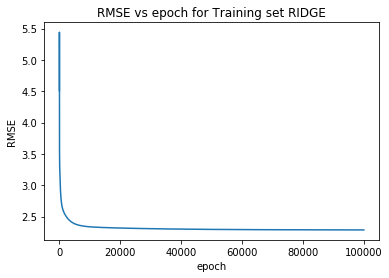

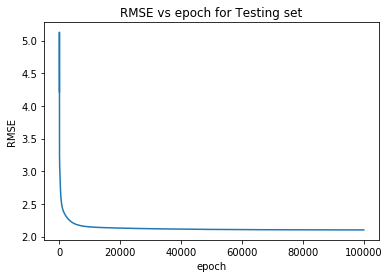

Parameter vector Regression using RIDGE =>
[[  3.02914899]
 [  0.94524672]
 [  1.46421726]
 [  9.98894199]
 [-11.0381519 ]
 [ 31.26947458]
 [-33.95107542]
 [ -8.81295993]
 [  7.15011602]]
2.2860863295494203 RMSE Training set Regression
2.1028525623440664 RMSE Testing set Regression
-------------------------------------------


In [12]:
alphas = np.logspace(-4,1,1000)
model = Ridge()
grid = GridSearchCV(estimator=model,param_grid=dict(alpha=alphas),cv=5)
grid.fit(min_RMSE_train_x,min_RMSE_train_y)
L = grid.best_estimator_.alpha
print(L,'<- optimal hyperparameter')
theta,rms_err = regression_ridge_l2(min_RMSE_train_x, min_RMSE_train_y, alpha ,min_RMSE_test_x,min_RMSE_test_y,L=L)
print('Parameter vector Regression using RIDGE =>')
print(theta.T)
print(rms_err, 'RMSE Training set Regression')
print(cost(min_RMSE_test_x, min_RMSE_test_y, theta), 'RMSE Testing set Regression')
print('-------------------------------------------')

In [13]:
def regression_lasso_l1(x, y, alpha,x_val,y_val,L=0.1,epoch = 100000):
    print(L,'L')
    rms_arr = [0] * epoch
    rms_validation = [0]*epoch
    theta = np.zeros((1, 9))
    for i in range(9):
        theta[0, i] = 2
    y = np.reshape(y, (-1, 1))
    for k in range(epoch):
        b = x @ theta.T
        c = b - y
        ss = np.sum(x * c, axis=0) / x.shape[0]
        ss+= 2*L*np.sum(theta/np.abs(theta))
        theta -= (alpha * ss)
        rms_arr[k] = cost(x, y, theta)
        rms_validation[k] = cost(x_val,y_val,theta)
    plt.plot(rms_arr)
    plt.title('RMSE vs epoch for Training set LASSO')
    plt.ylabel('RMSE')
    plt.xlabel('epoch')
    plt.show()
    plt.plot(rms_validation)
    plt.title('RMSE vs epoch for Testing set')
    plt.ylabel('RMSE')
    plt.xlabel('epoch')
    plt.show()
    return theta,rms_arr[-1]

0.0016263395040481922 <- optimal hyperparameter
0.0016263395040481922 L


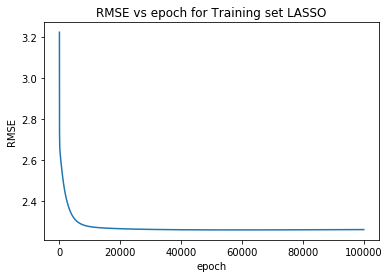

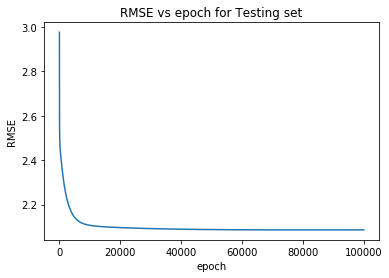

Parameter vector Regression using LASSO =>
[[  3.01371979]
 [  0.9281386 ]
 [  1.13880735]
 [  9.29119025]
 [ -5.56311732]
 [ 28.26131061]
 [-32.23966397]
 [ -8.00251894]
 [  8.30553223]]
2.2628100167879808 RMSE Training set Regression
2.0857584830250215 RMSE Testing set Regression
-------------------------------------------


In [14]:
alphas = np.logspace(-4,1,1000)
model = Lasso()
grid = GridSearchCV(estimator=model,param_grid=dict(alpha=alphas),cv=5)
grid.fit(min_RMSE_train_x,min_RMSE_train_y)
L = grid.best_estimator_.alpha
print(L,'<- optimal hyperparameter')
theta,rms_err = regression_lasso_l1(min_RMSE_train_x, min_RMSE_train_y, alpha,min_RMSE_test_x,min_RMSE_test_y,L=L)
print('Parameter vector Regression using LASSO =>')
print(theta.T)
print(rms_err, 'RMSE Training set Regression')
print(cost(min_RMSE_test_x, min_RMSE_test_y, theta), 'RMSE Testing set Regression')
print('-------------------------------------------')

In [15]:
print(v)

4
